In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# 1.Global Earthquakes
# Read the file "usgs_earthquakes.csv" and rename it "Usgs_Eqs"
Usgs_Eqs=pd.read_csv("usgs_earthquakes.csv")
# Observe each column and know that all the time data belongs to Year 2014 
# No need to select rows with "time=2014"
Usgs_Eqs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014/1/31 23:53,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014/1/31 23:48,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014/1/31 23:47,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014/1/31 23:30,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014/1/31 23:30,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [4]:
# Use the function sort_values() to sequence "mag" 
Equs_head50=Usgs_Eqs.sort_values("mag",ascending=False).head(50)# Get the head 50 rows
# The lowest and highest "mag" among top 50 earthquakes are equal to "6.5" and "8.2", respectively
Equs_head50

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014/4/1 23:46,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014/6/23 20:53,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014/4/3 2:43,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014/4/12 20:14,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014/4/19 13:28,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014/4/13 12:36,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014/10/14 3:51,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014/4/18 14:27,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014/4/11 7:07,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014/11/15 2:31,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


In [6]:
# Considering some earthquakes with mag = 6.5, but not listed in the top 50 earthquakes
List_Equs_Mag_largerorequal6_5=Usgs_Eqs.loc[Usgs_Eqs["mag"]>=6.5].sort_values("mag",
                                                                              ascending=False)
List_Equs_Mag_largerorequal6_5

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014/4/1 23:46,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014/6/23 20:53,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014/4/3 2:43,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014/4/12 20:14,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014/4/19 13:28,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014/4/13 12:36,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014/10/14 3:51,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014/4/18 14:27,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
111052,2014/11/1 18:57,-19.6903,-177.7587,434.00,7.1,mww,NaN,13.0,4.41500,0.84,us,usc000stdc,2015-01-20T09:03:09.040Z,"144km NE of Ndoi Island, Fiji",earthquake
34318,2014/4/11 7:07,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Text(0.5, 1.0, 'Top 50 earthquakes at 2014')

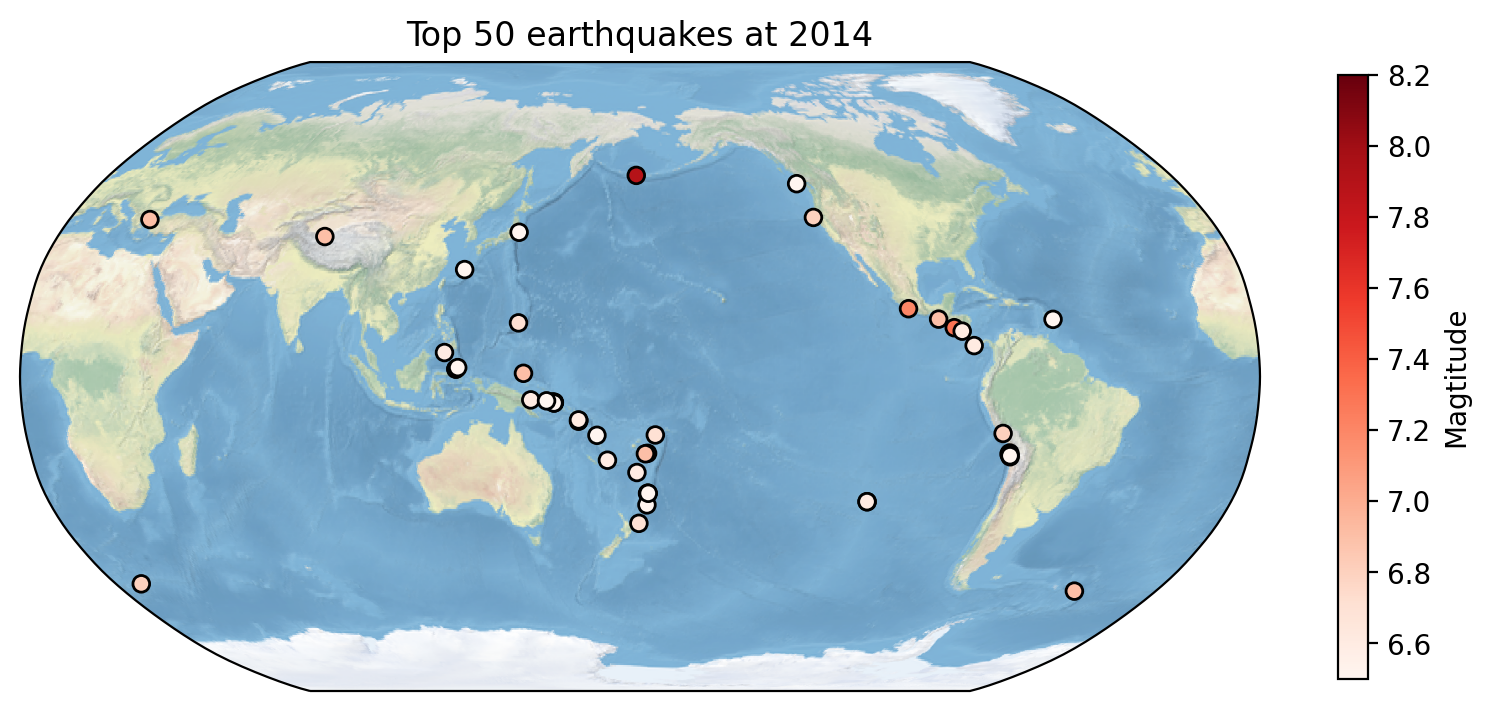

In [7]:
# Set the coordinate "longitude" and "latitude" as x and y, respectively
x=Equs_head50["longitude"]
y=Equs_head50["latitude"]
# Create a variable "Magtitude" based on column "mag"
Magtitude=Equs_head50["mag"]
# Create a plotting object
plotting=plt.figure(figsize=(10,8), dpi=200)
# Set the plotting projection "ccrs.Robinson"
proj=ccrs.Robinson(central_longitude=180)# According to Mr.zhu's requirements in this question, 
                                         # the central longitude is 180. 
ax=plotting.add_subplot(projection=proj)
# Add the map sticker to distingush the ocean and the land
ax.stock_img()# Inspired from https://blog.csdn.net/qq_40497403/article/details/119248198
# Plot the scatter figure of the top 50 earthquakes
plt.scatter(x,y,c=Magtitude,cmap="Reds",edgecolors="black",vmin=6.5,vmax=8.2,
            transform=ccrs.PlateCarree())
# Add the colorbar and set the title
plt.colorbar(shrink=0.5,label="Magtitude")
plt.title("Top 50 earthquakes at 2014",fontsize=12)

Text(0.5, 1.0, 'Earthquakes with magnitude >= 6.5 at 2014')

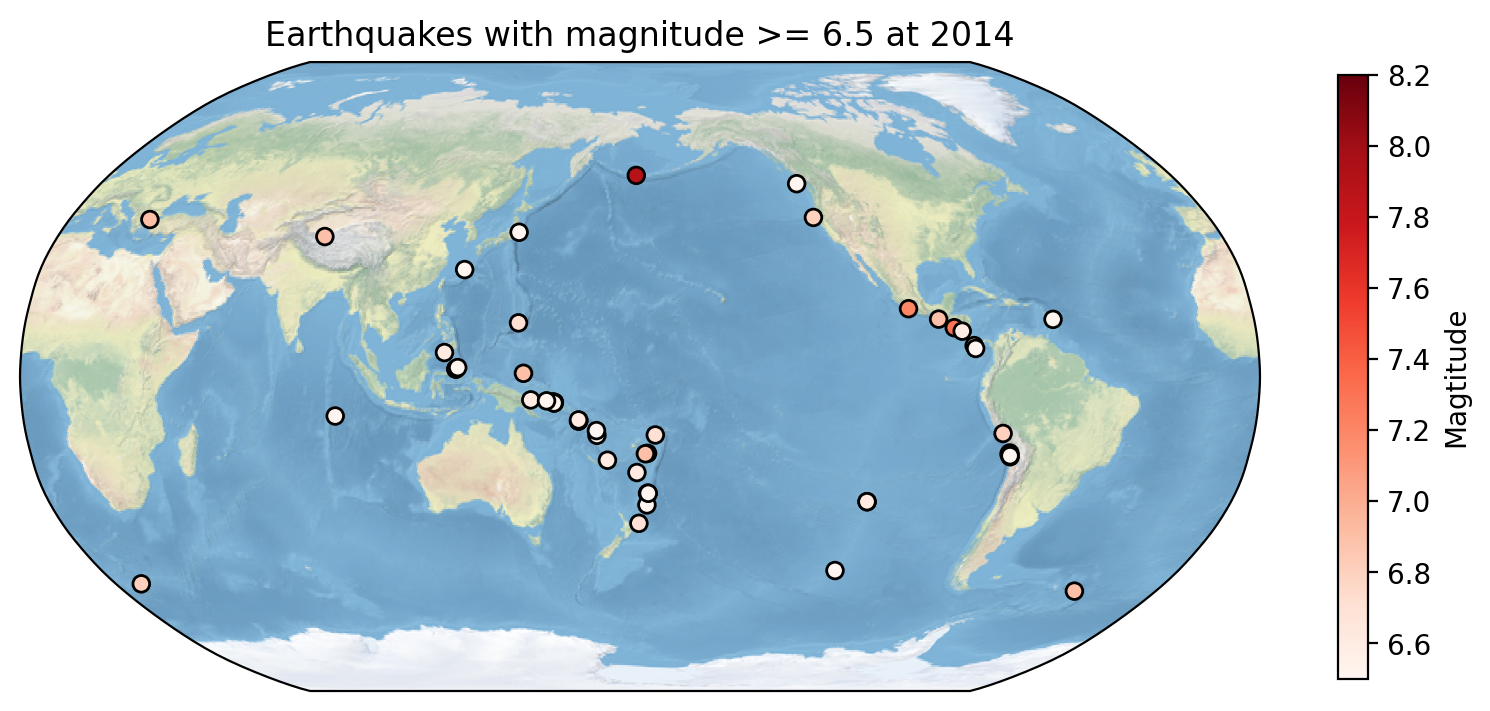

In [8]:
# Do the same orperations for "List_Equs_Mag_largerorequal6_5"
# Set the coordinate and create a variable "Magtitude2"
x2=List_Equs_Mag_largerorequal6_5["longitude"]
y2=List_Equs_Mag_largerorequal6_5["latitude"]
Magtitude2=List_Equs_Mag_largerorequal6_5["mag"]
# Create a plotting object and set the projection "ccrs.Robinson"
plotting2=plt.figure(figsize=(10,8), dpi=200)
proj=ccrs.Robinson(central_longitude=180)
ax=plotting2.add_subplot(projection=proj)
ax.stock_img()# Add the map sticker 
# Plot the scatter figure of the earthquakes with mag >= 6.5
plt.scatter(x2,y2,c=Magtitude2,cmap="Reds",edgecolors="black",vmin=6.5,vmax=8.2,
            transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5,label="Magtitude")
plt.title("Earthquakes with magnitude >= 6.5 at 2014",fontsize=12)

In [9]:
# 2.Explore a netCDF dataset
# Open a dataset
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
# Select the data in 2008
Temp_2008=ds.tas.sel(time="2008")
# Compute the average Temp in 2008
Average_temp_2008=np.mean(Temp_2008,axis=0)
Average_temp_2008

D:\Users\60918\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.DataArray 'tas' (lat: 192, lon: 288)>
array([[225.68904, 225.68904, 225.68904, ..., 225.68904, 225.68909,
        225.68909],
       [225.95027, 225.917  , 225.7666 , ..., 225.9668 , 225.96483,
        225.95796],
       [226.3095 , 226.27367, 226.26031, ..., 226.52269, 226.47725,
        226.41267],
       ...,
       [261.74112, 261.76352, 261.78543, ..., 261.68265, 261.70135,
        261.72   ],
       [261.73532, 261.74377, 261.75272, ..., 261.7092 , 261.7178 ,
        261.72668],
       [261.7146 , 261.71503, 261.71536, ..., 261.71317, 261.7137 ,
        261.71414]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


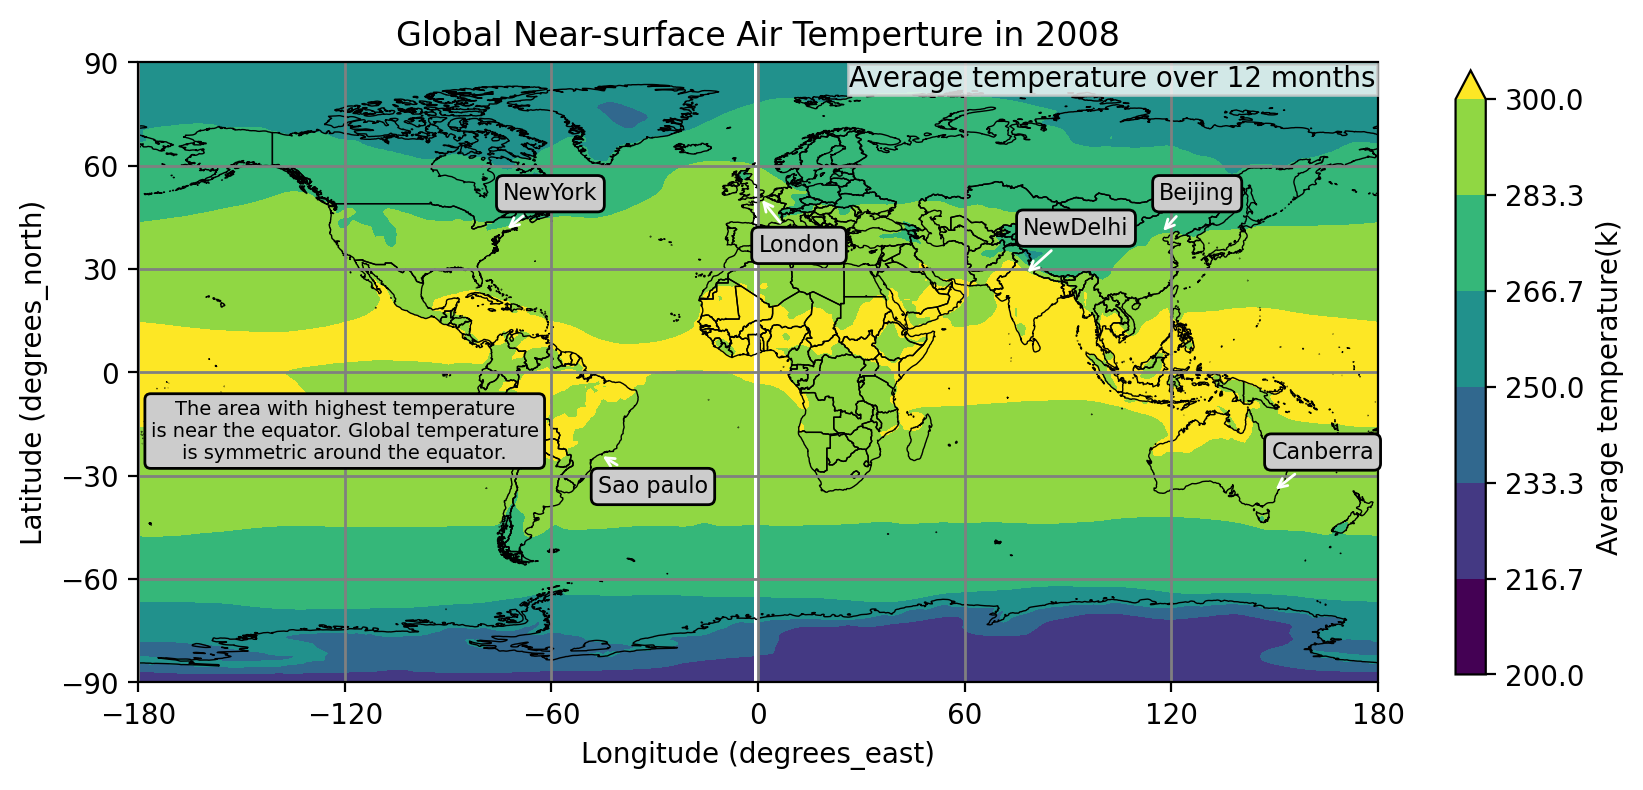

In [11]:
# 2.1 Make a global map of a certain variable
# Create a figure object
plt.figure(figsize=(10,8), dpi=200)
# Set a PlateCarree projection
proj = ccrs.PlateCarree(central_longitude=0)
# Create an axes with the projection set above
ax = plt.axes(projection=proj)
# Plot a contourf figure based on the DataArray "Average_temp_2008" and show its colorbar
Average_temp_2008.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=200, vmax=300,
                                cbar_kwargs={"shrink": 0.5, "label":"Average temperature(k)"})
# Use the function add_feature() to add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category="cultural",
                                           name="admin_0_countries",
                                           scale="50m",
                                           facecolor="none",
                                           edgecolor="black",
                                           linewidth=0.5))
# Add gridlines
ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color="gray")

# Show x/ylabel and x/yticks
plt.xticks(ticks=np.arange(-180,181,60),fontsize=10)
plt.yticks(ticks=np.arange(-90,91,30),fontsize=10)
plt.xlabel("Longitude (degrees_east)",fontsize=10)
plt.ylabel("Latitude (degrees_north)",fontsize=10)
# Show title
plt.title("Global Near-surface Air Temperture in 2008",fontsize=12)
# Add annotate
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(arrowstyle = "->",color="white")
plt.annotate("Beijing", xy=(116.5,39.9),xytext=(116.5,50),fontsize=8,bbox=bbox,
             arrowprops=arrowprops)
plt.annotate("NewYork", xy=(-74,40.7),xytext=(-74,50),fontsize=8,bbox=bbox,arrowprops=arrowprops)
plt.annotate("London", xy=(0.1,51.3),xytext=(0.1,35),fontsize=8,bbox=bbox,arrowprops=arrowprops)
plt.annotate("NewDelhi", xy=(77,28),xytext=(77,40),fontsize=8,bbox=bbox,arrowprops=arrowprops)
plt.annotate("Canberra", xy=(149,-35),xytext=(149,-25),fontsize=8,bbox=bbox,
             arrowprops=arrowprops)
plt.annotate("Sao paulo", xy=(-46.5,-23.5),xytext=(-46.5,-35),fontsize=8,bbox=bbox,
             arrowprops=arrowprops)
# Add textbox
plt.text(-120,-25,
         "The area with highest temperature\nis near the equator. Global temperature\nis symmetric around the equator.",
         fontsize=7,bbox=bbox,horizontalalignment="center")
# Add legend
plt.legend(title="Average temperature over 12 months",loc="best",fontsize=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


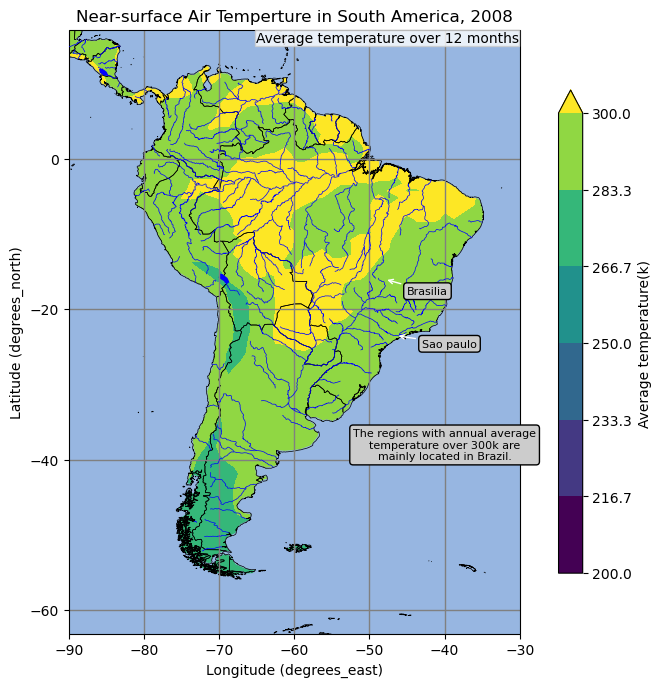

In [12]:
# 2.2 Make a regional map of the same variable
# Create a figure object
plt.figure(figsize=(10,8),dpi=100)
# Set the coordinate of the plotting center
central_lon,central_lat = -60,-15 
# Set a PlateCarree projection
proj2 = ccrs.PlateCarree() 
# Create an axes
ax = plt.axes(projection=proj2)
# Frame the regional drawing area
extent = [central_lon-30, central_lon+30, central_lat-45, central_lat+30]
ax.set_extent(extent)
# Plot a contourf figure and show its colorbar
Average_temp_2008.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                                vmin=200, vmax=300, 
                                cbar_kwargs={"shrink": 0.8, "label":"Average temperature(k)"})
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category="cultural",
                                           name="admin_0_countries",
                                           scale="50m",
                                           facecolor="none",
                                           edgecolor="black",
                                           linewidth=0.5))
# Add features of ocean, lakes and rivers
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor="blue", facecolor="blue", zorder=2)
rivers = cfeature.NaturalEarthFeature("physical", "rivers_lake_centerlines", "10m")
ax.add_feature(rivers,facecolor="None", edgecolor="blue", linewidth=0.5, zorder=3)
# Add coastlines
ax.coastlines(resolution="10m", linewidth=0.5)
# Add gridlines
ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color="gray")
# Show x/ylabel and x/yticks
plt.xticks(ticks=np.arange(-90,-29,10),fontsize=10)
plt.yticks(ticks=np.arange(-60,16,20),fontsize=10)
plt.xlabel("Longitude (degrees_east)",fontsize=10)
plt.ylabel("Latitude (degrees_north)",fontsize=10)
# Show title
plt.title("Near-surface Air Temperture in South America, 2008",fontsize=12)
# Add annotate
plt.annotate("Brasilia", xy=(-48,-16),xytext=(-45,-18),fontsize=8,bbox=bbox,
             arrowprops=arrowprops)
plt.annotate("Sao paulo", xy=(-46.5,-23.5),xytext=(-43,-25),fontsize=8,bbox=bbox,
             arrowprops=arrowprops)
# Add textbox
plt.text(-40,-40,
         "The regions with annual average\ntemperature over 300k are\nmainly located in Brazil.",
         fontsize=8,bbox=bbox,horizontalalignment="center")
# Add legend
plt.legend(title="Average temperature over 12 months",loc="best",fontsize=0.1)